<a href="https://colab.research.google.com/github/agterzis/Machine-Learning/blob/main/%CE%9C%CE%B7%CF%87%CE%B1%CE%BD%CE%B9%CE%BA%CE%AE_%CE%9C%CE%AC%CE%B8%CE%B7%CF%83%CE%B7_%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip archive.zip

Archive:  archive.zip
  inflating: dataset/Beagle/Beagle_1.jpg  
  inflating: dataset/Beagle/Beagle_10.jpg  
  inflating: dataset/Beagle/Beagle_100.jpg  
  inflating: dataset/Beagle/Beagle_11.jpg  
  inflating: dataset/Beagle/Beagle_12.jpg  
  inflating: dataset/Beagle/Beagle_13.jpg  
  inflating: dataset/Beagle/Beagle_14.jpg  
  inflating: dataset/Beagle/Beagle_15.jpg  
  inflating: dataset/Beagle/Beagle_16.jpg  
  inflating: dataset/Beagle/Beagle_17.jpg  
  inflating: dataset/Beagle/Beagle_18.jpg  
  inflating: dataset/Beagle/Beagle_19.jpg  
  inflating: dataset/Beagle/Beagle_2.jpg  
  inflating: dataset/Beagle/Beagle_20.jpg  
  inflating: dataset/Beagle/Beagle_21.jpg  
  inflating: dataset/Beagle/Beagle_22.jpg  
  inflating: dataset/Beagle/Beagle_23.jpg  
  inflating: dataset/Beagle/Beagle_24.jpg  
  inflating: dataset/Beagle/Beagle_25.jpg  
  inflating: dataset/Beagle/Beagle_26.jpg  
  inflating: dataset/Beagle/Beagle_27.jpg  
  inflating: dataset/Beagle/Beagle_28.jpg  
  inflating

In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

DATA_DIR = "dataset"
IMG_SIZE = 64
data = []
labels = []

# Εύρεση των κλάσεων
classes = sorted(os.listdir(DATA_DIR))
num_classes = len(classes)
print(f"Βρέθηκαν {num_classes} κατηγορίες: {classes}")

# Φόρτωση εικόνων
for idx, class_name in enumerate(classes):
    class_path = os.path.join(DATA_DIR, class_name)
    for img_name in os.listdir(class_path):
        try:
            img_path = os.path.join(class_path, img_name)
            # Φόρτωση ως RGB
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Αλλαγή μεγέθους σε 64x64
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            data.append(img)
            labels.append(idx)
        except Exception as e:
            pass

# Μετατροπή σε numpy arrays και κανονικοποίηση (0-1)
X = np.array(data) / 255.0  # Κανονικοποίηση για ταχύτερη σύγκλιση
y = np.array(labels)

# One-hot encoding των targets
y = to_categorical(y, num_classes=num_classes)

# Διαχωρισμός σε Train και Test set (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Δεδομένα εκπαίδευσης: {X_train.shape}")
print(f"Δεδομένα ελέγχου: {X_test.shape}")

Βρέθηκαν 10 κατηγορίες: ['Beagle', 'Boxer', 'Bulldog', 'Dachshund', 'German_Shepherd', 'Golden_Retriever', 'Labrador_Retriever', 'Poodle', 'Rottweiler', 'Yorkshire_Terrier']
Δεδομένα εκπαίδευσης: (773, 64, 64, 3)
Δεδομένα ελέγχου: (194, 64, 64, 3)


In [13]:
import tensorflow as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Δημιουργία MLP
mlp_model = Sequential([
    Input(shape=(64, 64, 3)),
    Flatten(),                    # Μετατροπή της εικόνας σε διάνυσμα (64*64*3 = 12288 είσοδοι)
    Dense(512, activation='relu'),# Hidden Level 1
    Dense(256, activation='relu'),# Hidden Level 2
    Dense(num_classes, activation='softmax') # Output Level
])

# Ανάλυση αρχιτεκτονικής
mlp_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │     6,291,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,425,866 (24.51 MB)

 Trainable params: 6,425,866 (24.51 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
mlp_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Εκπαίδευση
history_mlp = mlp_model.fit(X_train, y_train,
                            validation_data=(X_test, y_test),
                            batch_size=32,
                            epochs=30,
                            verbose=1)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.0959 - loss: 8.8350 - val_accuracy: 0.2113 - val_loss: 3.7930
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.2309 - loss: 2.6877 - val_accuracy: 0.2990 - val_loss: 1.9115
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.3518 - loss: 1.8061 - val_accuracy: 0.4588 - val_loss: 1.6501
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.4660 - loss: 1.5757 - val_accuracy: 0.3608 - val_loss: 1.8272
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.5560 - loss: 1.4535 - val_accuracy: 0.6340 - val_loss: 1.1553
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.6883 - loss: 1.0345 - val_accuracy: 0.6495 - val_loss: 1.2061
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.7895 - loss: 0.7812 - val_accuracy: 0.4691 - val_loss: 1.6559
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.6987 - loss: 1.0365 - val_accuracy: 0.8557 - v

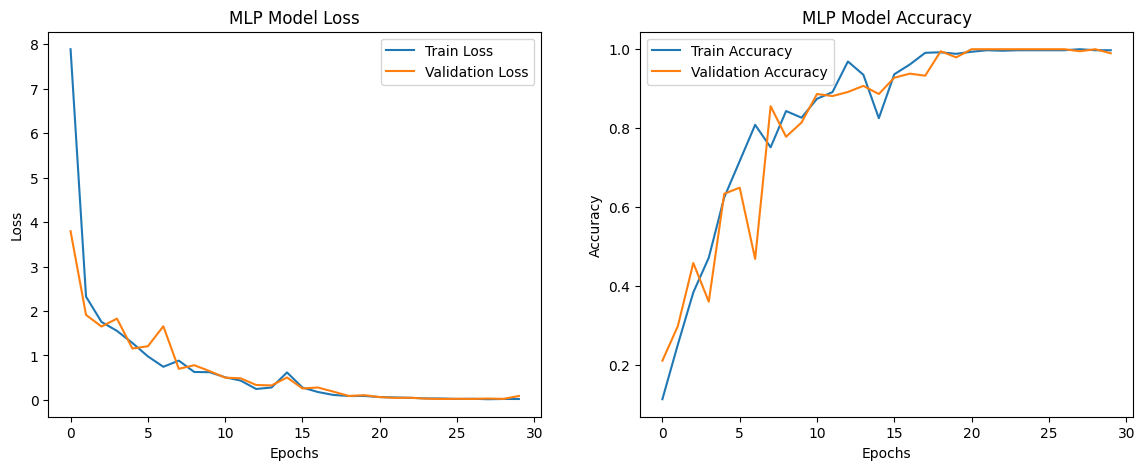

In [15]:
plt.figure(figsize=(14, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['loss'], label='Train Loss')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['accuracy'], label='Train Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [16]:
cnn_model = Sequential([
    Input(shape=(64, 64, 3)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,490 (2.61 MB)

 Trainable params: 684,490 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_cnn = cnn_model.fit(X_train, y_train,
                            validation_data=(X_test, y_test),
                            batch_size=32,
                            epochs=30,
                            verbose=1)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.1413 - loss: 2.3110 - val_accuracy: 0.1186 - val_loss: 2.1973
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.2903 - loss: 1.9917 - val_accuracy: 0.4021 - val_loss: 1.7243
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.5396 - loss: 1.4209 - val_accuracy: 0.6134 - val_loss: 1.2700
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.7258 - loss: 0.8063 - val_accuracy: 0.8557 - val_loss: 0.5541
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.9039 - loss: 0.3670 - val_accuracy: 0.9485 - val_loss: 0.2613
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.9811 - loss: 0.1401 - val_accuracy: 0.9948 - val_loss: 0.0441
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - accuracy: 0.9966 - loss: 0.0266 - val_accuracy: 0.9948 - val_loss: 0.0153
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 0.

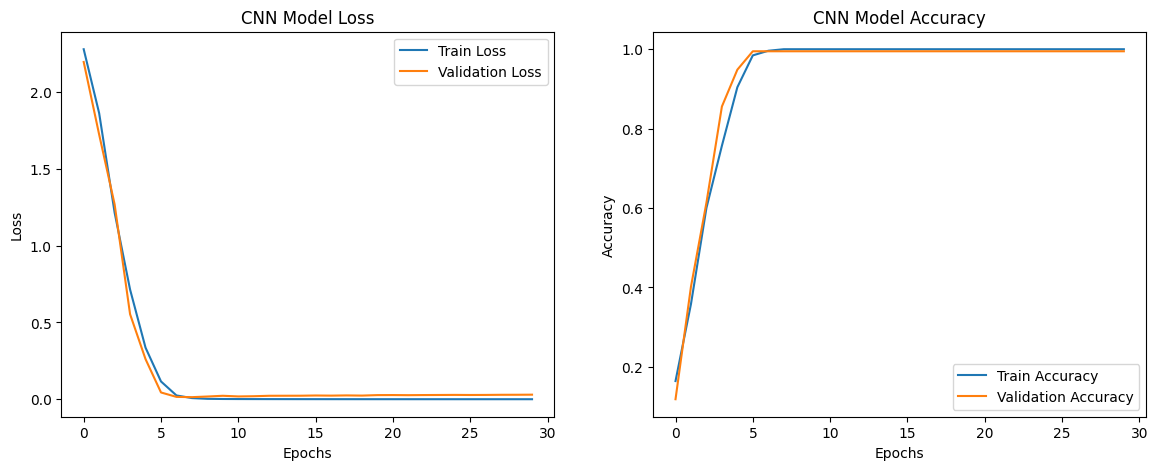

In [18]:
plt.figure(figsize=(14, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()